In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from algorithms import K_means, DBSCAN
from metrics import calculate_silhouette,intra_cluster,inter_cluster
from sklearn.metrics import silhouette_score,homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score


In [2]:
dataset = pd.read_csv("./new_dataset.csv")
dataset

,Fertility,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM
0,0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128
1,2,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145
2,0,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812
3,0,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239
4,0,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,1,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624
618,1,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000
619,1,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333
620,2,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291


In [3]:
true_labels = dataset["Fertility"].values

Elimination l'attribut Fertility

In [4]:
data=dataset.iloc[:,1:]
data

,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM
0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128
1,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145
2,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812
3,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239
4,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632
...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624
618,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000
619,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333
620,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291


Reduction des attributs pour la visualisation

In [5]:
from sklearn.decomposition import PCA
# Extract the features from your dataset
features = data.iloc[:, :].values  # Exclude the target variable

# Standardize the features (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler
features_standardized = StandardScaler().fit_transform(features)

# Apply PCA to reduce the features to 2 components
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_standardized)

# Create a new DataFrame with the reduced features
data_2d = pd.DataFrame(data=features_2d, columns=['PC1', 'PC2'])

In [6]:
data_2d

,PC1,PC2
0,-2.098855,-0.779449
1,0.760473,2.674088
2,0.125150,0.178104
3,-0.078576,0.088615
4,2.432752,-0.202375
...,...,...
617,0.606674,2.255787
618,-0.296291,-0.113393
619,-0.871605,0.343684
620,1.881489,1.690816


Clustering basé partitionnement: K-means

In [92]:
kmeans_cluster=K_means(3, 50)
kmeans_cluster.fit(data)

,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM,Cluster
0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128,0
1,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145,2
2,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812,1
3,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239,0
4,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624,2
618,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000,0
619,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333,1
620,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291,2


In [ ]:
silhouette_score(data,kmeans_cluster.labels_)

Experimentation avec hyperparametres

Nombre de clusters:

In [58]:
# number of clusters K
labels=[]
centroids=[]
homogeneity=[]
completeness=[]
v_measure=[]
adjusted_rand=[]
silhouette=[]
for i in range(1,10):
    kmeans_cluster=K_means(i, 50) # Set number of iteration to 50
    kmeans_cluster.fit(data)
    labels.append(kmeans_cluster.labels_)
    centroids.append(kmeans_cluster.centroids_)
    homogeneity.append(homogeneity_score(true_labels,kmeans_cluster.labels_))
    completeness.append(completeness_score(true_labels,kmeans_cluster.labels_))
    v_measure.append(v_measure_score(true_labels,kmeans_cluster.labels_))
    adjusted_rand.append(adjusted_rand_score(true_labels,kmeans_cluster.labels_))
    silhouette.append(silhouette_score(data,kmeans_cluster.labels_))
     

Evaluation, Analyse et Comparaison:

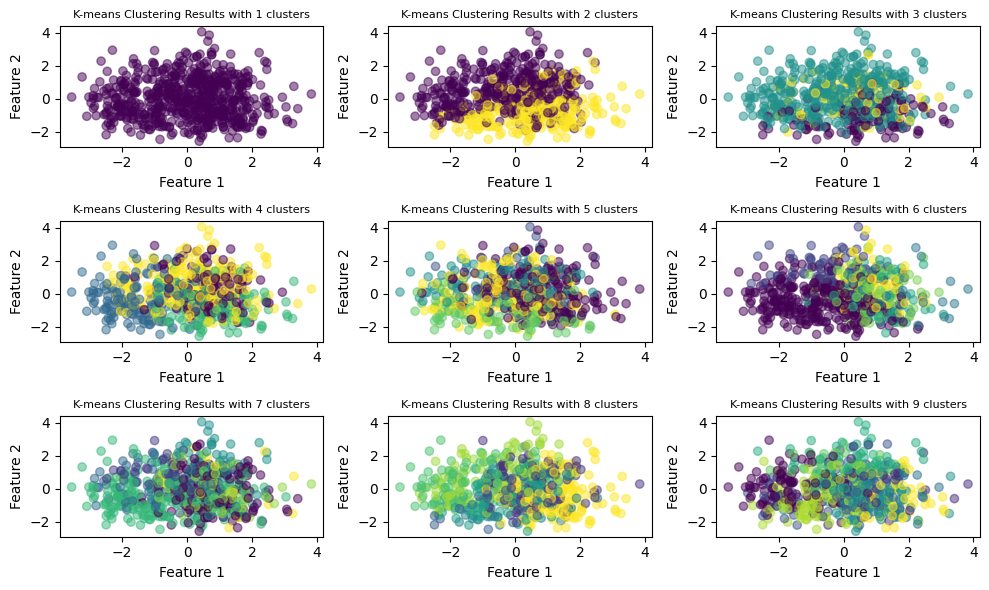

In [61]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data
features_to_visualize = data_2d.iloc[:, :2].values  # Use the relevant features

# Assuming you have already performed K-means clustering and obtained labels
kmeans_cluster_labels = kmeans_cluster.labels_  # Replace 'Cluster' with your actual cluster labels column

plt.figure(figsize=(10, 6))
for i in range(9):
    kmeans_cluster_labels=labels[i]
    plt.subplot(3,3,i+1)
    plt.scatter(features_to_visualize[:, 0], features_to_visualize[:, 1], c=kmeans_cluster_labels, cmap='viridis', alpha=0.5)
    plt.xlabel('Feature 1')  # Replace with your actual feature name
    plt.ylabel('Feature 2')  # Replace with your actual feature name
    plt.title(f'K-means Clustering Results with {i+1} clusters', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
sse_total = []
for i in range(len(labels)):
    k_labels = labels[i]
    sse = 0

    for j in range(len(data)):
        # Extract features and cluster label for the current data point
        features = data.iloc[j, :].values  # Exclude the 'Cluster' column
        cluster_label = k_labels[j]

        # Calculate the squared Euclidean distance between the data point and its assigned cluster center
       
        dist = np.sum((features - centroids[i][k_labels[j]])**2)
        sse += dist
    sse_total.append(sse)


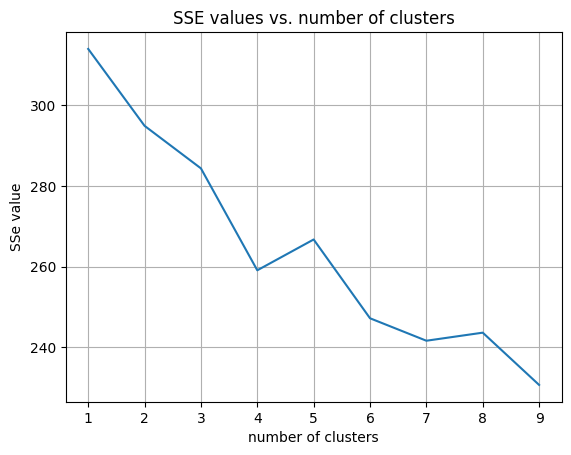

In [65]:
k_numbers=[1,2,3,4,5,6,7,8,9]
metrics=['homogeneity','completeness','v_measure','adjusted_rand_score','silhouette','SSE']
metrics_values=[homogeneity,completeness,v_measure,adjusted_rand,silhouette,sse_total]
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(3,3,i+1)
    # Plot the results
    plt.plot(k_numbers,metrics_values[i])
    plt.title(f'{metrics[i]} values vs. number of clusters')
    plt.xlabel('number of clusters')
    plt.ylabel(f'{metrics[i]}')
    plt.grid(True)
plt.tight_layout()
plt.show()

Nombre d'iterations:

In [ ]:
# For nb_iterations
labels1=[]
centroids1=[]
homogeneity=[]
completeness=[]
v_measure=[]
adjusted_rand=[]
silhouette=[]
for i in range(10,100,10):
    kmeans_cluster=K_means(3, i) # Set number of clusters to 3
    kmeans_cluster.fit(data)
    labels1.append(kmeans_cluster.labels_)
    centroids1.append(kmeans_cluster.centroids_)
    homogeneity.append(homogeneity_score(true_labels,kmeans_cluster.labels_))
    completeness.append(completeness_score(true_labels,kmeans_cluster.labels_))
    v_measure.append(v_measure_score(true_labels,kmeans_cluster.labels_))
    adjusted_rand.append(adjusted_rand_score(true_labels,kmeans_cluster.labels_))
    silhouette.append(silhouette_score(data,kmeans_cluster.labels_))
     

Evaluation, Analyse et Comparaison:

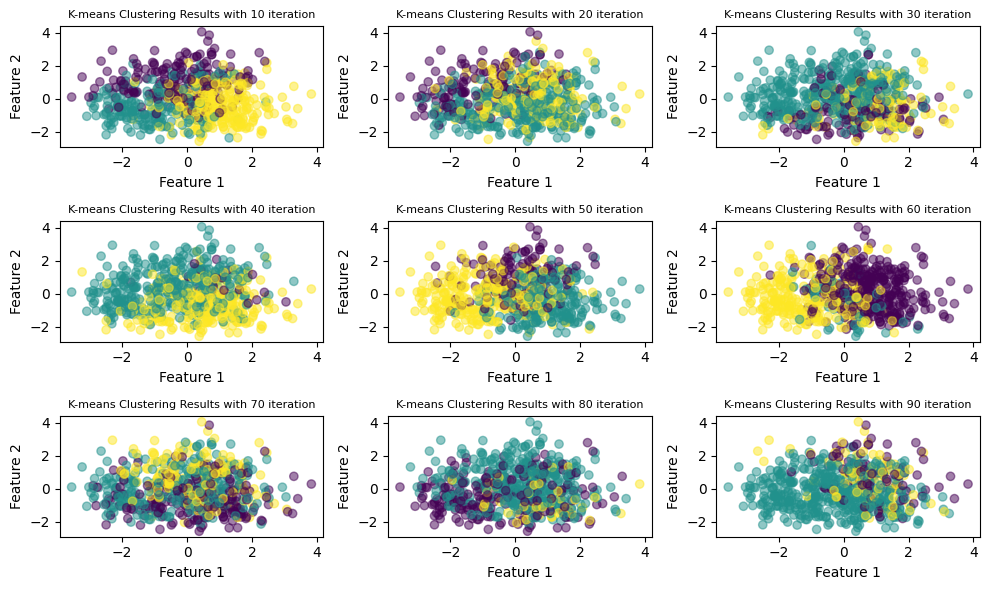

In [78]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data
features_to_visualize = data_2d.iloc[:, :2].values  # Use the relevant features

# Assuming you have already performed K-means clustering and obtained labels
kmeans_cluster_labels = kmeans_cluster.labels_  # Replace 'Cluster' with your actual cluster labels column

plt.figure(figsize=(10, 6))
for i in range(9):
    kmeans_cluster_labels=labels1[i]
    plt.subplot(3,3,i+1)
    plt.scatter(features_to_visualize[:, 0], features_to_visualize[:, 1], c=kmeans_cluster_labels, cmap='viridis', alpha=0.5)
    plt.xlabel('Feature 1')  # Replace with your actual feature name
    plt.ylabel('Feature 2')  # Replace with your actual feature name
    plt.title(f'K-means Clustering Results with {i*10+10} iteration', fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
sse_total = []
for i in range(len(labels1)):
    k_labels = labels1[i]
    sse = 0

    for j in range(len(data)):
        # Extract features and cluster label for the current data point
        features = data.iloc[j, :].values  # Exclude the 'Cluster' column
        cluster_label = k_labels[j]

        # Calculate the squared Euclidean distance between the data point and its assigned cluster center
       
        dist = np.sum((features - centroids1[i][k_labels[j]])**2)
        sse += dist
    sse_total.append(sse)


In [ ]:
iteration_numbers=[10,20,30,40,50,60,70,80,90]
metrics=['homogeneity','completeness','v_measure','adjusted_rand_score','silhouette','SSE']
metrics_values=[homogeneity,completeness,v_measure,adjusted_rand,silhouette,sse_total]
# Plot the results
plt.plot(iteration_numbers, metrics_values[i])
plt.title(f'{metrics[i]} values vs. number of iterations')
plt.xlabel('number of clusters')
plt.ylabel(f'{metrics[i]} value')
plt.grid(True)
plt.show()

Clustering basé densité DBSCAN

In [45]:
dbscan_cluster=DBSCAN(0.7, 15)
dbscan_cluster.fit(data)

,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM,Cluster
0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128,0
1,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145,0
2,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812,0
3,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239,0
4,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624,0
618,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000,0
619,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333,0
620,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291,0


In [46]:
silhouette_score(data,dbscan_cluster.labels_)

0.19585826865793074

Experimentation avec hyperparametres

Valeur de Epsilon(r):

In [26]:
# value of epsilon(r)
labels=[]
homogeneity=[]
completeness=[]
v_measure=[]
adjusted_rand=[]
silhouette=[]
for i in range(1,10,1):
    dbscan_cluster=DBSCAN(i/10,15) # Set min points to 15
    dbscan_cluster.fit(data)
    labels.append(dbscan_cluster.labels_)
    homogeneity.append(homogeneity_score(true_labels,dbscan_cluster.labels_))
    completeness.append(completeness_score(true_labels,dbscan_cluster.labels_))
    v_measure.append(v_measure_score(true_labels,dbscan_cluster.labels_))
    adjusted_rand.append(adjusted_rand_score(true_labels,dbscan_cluster.labels_))
    if len(np.unique(dbscan_cluster.labels_))>1:
        silhouette.append((i,silhouette_score(data,dbscan_cluster.labels_)))
     

Evaluation, Analyse et Comparaison:

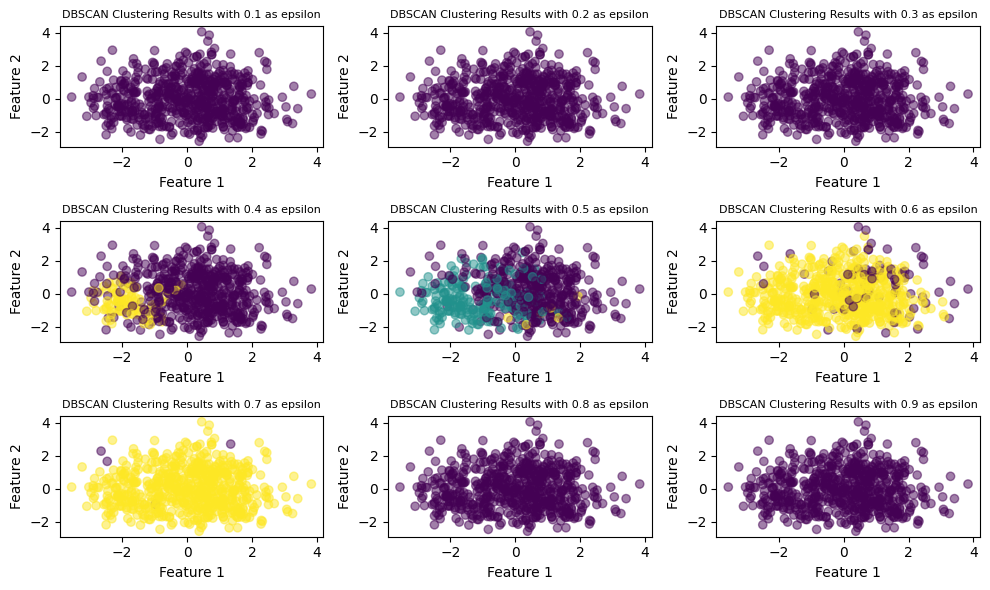

In [42]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data
features_to_visualize = data_2d.iloc[:, :2].values  # Use the relevant features

# Assuming you have already performed K-means clustering and obtained labels
dbscan_cluster_labels = dbscan_cluster.labels_  # Replace 'Cluster' with your actual cluster labels column

plt.figure(figsize=(10, 6))
for i in range(9):
    dbscan_cluster_labels=labels[i]
    plt.subplot(3,3,i+1)
    plt.scatter(features_to_visualize[:, 0], features_to_visualize[:, 1], c=dbscan_cluster_labels, cmap='viridis', alpha=0.5)
    plt.xlabel('Feature 1')  # Replace with your actual feature name
    plt.ylabel('Feature 2')  # Replace with your actual feature name
    plt.title(f'DBSCAN Clustering Results with {(i+1)/10} as epsilon', fontsize=8)
plt.tight_layout()
plt.show()


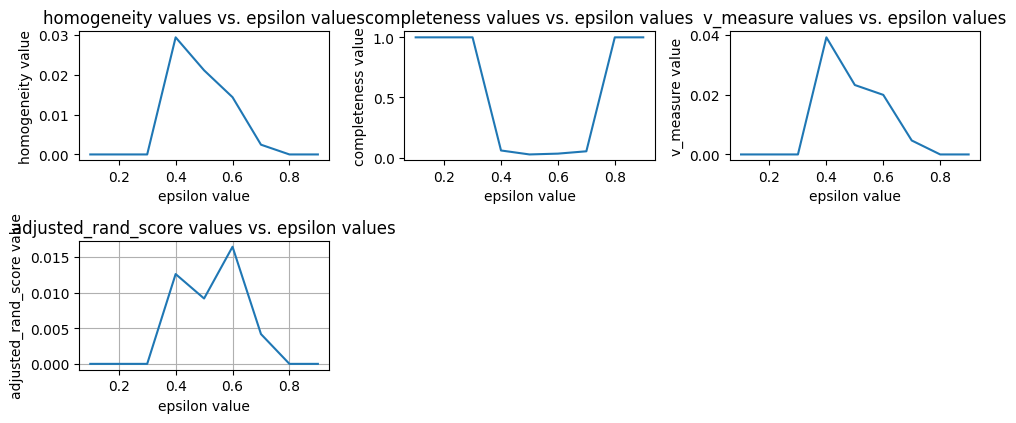

In [36]:
epsilon=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
metrics=['homogeneity','completeness','v_measure','adjusted_rand_score']
metrics_values=[homogeneity,completeness,v_measure,adjusted_rand]
plt.figure(figsize=(10, 6))
for i in range(4):
    # Plot the results
    plt.subplot(3,3,i+1)
    plt.plot(epsilon,metrics_values[i])
    plt.title(f'{metrics[i]} vs. epsilon values')
    plt.xlabel('epsilon value')
    plt.ylabel(f'{metrics[i]}')
plt.grid(True)
plt.tight_layout()
plt.show()

Nombre de Min Points:

In [38]:
# number of Min points
labels1=[]
homogeneity=[]
completeness=[]
v_measure=[]
adjusted_rand=[]
silhouette=[]
for i in range(5,35,5):
    dbscan_cluster=DBSCAN(0.5,i) # Set epsilon to fixed value 0.5
    dbscan_cluster.fit(data)
    labels1.append(dbscan_cluster.labels_)
    homogeneity.append(homogeneity_score(true_labels,dbscan_cluster.labels_))
    completeness.append(completeness_score(true_labels,dbscan_cluster.labels_))
    v_measure.append(v_measure_score(true_labels,dbscan_cluster.labels_))
    adjusted_rand.append(adjusted_rand_score(true_labels,dbscan_cluster.labels_))
    if len(np.unique(dbscan_cluster.labels_))>1:
        silhouette.append((i,silhouette_score(data,dbscan_cluster.labels_)))
     

Evaluation, Analyse et Comparaison:

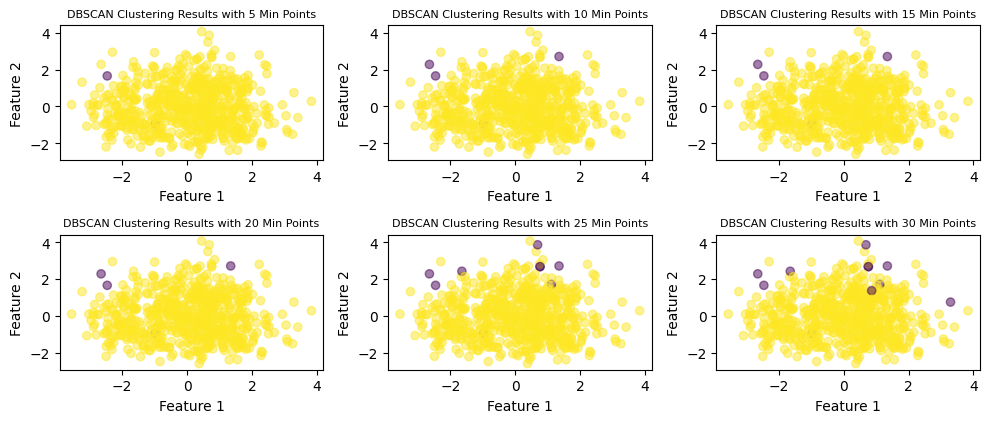

In [41]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named data
features_to_visualize = data_2d.iloc[:, :2].values  # Use the relevant features

# Assuming you have already performed K-means clustering and obtained labels
dbscan_cluster_labels = dbscan_cluster.labels_  # Replace 'Cluster' with your actual cluster labels column

plt.figure(figsize=(10, 6))
for i in range(6):
    dbscan_cluster_labels=labels1[i]
    plt.subplot(3,3,i+1)
    plt.scatter(features_to_visualize[:, 0], features_to_visualize[:, 1], c=dbscan_cluster_labels, cmap='viridis', alpha=0.5)
    plt.xlabel('Feature 1')  # Replace with your actual feature name
    plt.ylabel('Feature 2')  # Replace with your actual feature name
    plt.title(f'DBSCAN Clustering Results with {i*5+5} Min Points', fontsize=8)
plt.tight_layout()
plt.show()


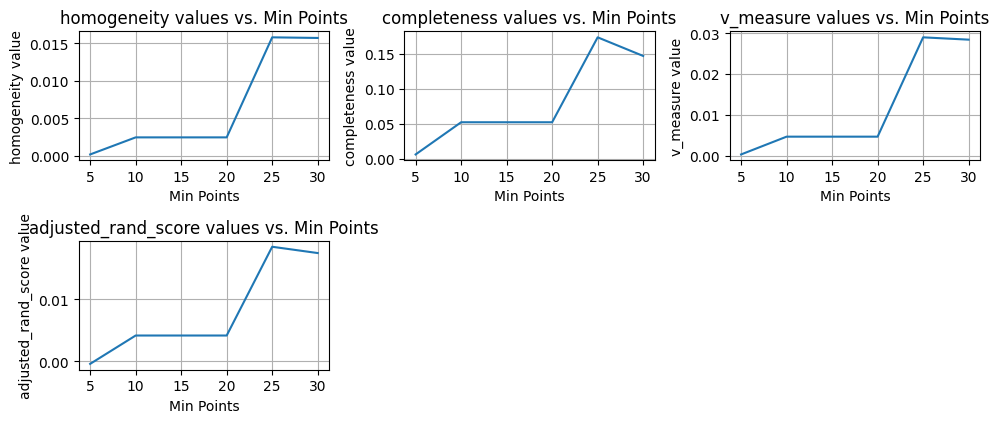

In [52]:
minpts=[5,10,15,20,25,30]
metrics=['homogeneity','completeness','v_measure','adjusted_rand_score']
metrics_values=[homogeneity,completeness,v_measure,adjusted_rand]
plt.figure(figsize=(10, 6))
for i in range(4):
    # Plot the results
    plt.subplot(3,3,i+1)
    plt.plot(minpts,metrics_values[i])
    plt.title(f'{metrics[i]} values vs. Min Points')
    plt.xlabel('Min Points')
    plt.ylabel(f'{metrics[i]} value')
    plt.grid(True)

plt.tight_layout()
plt.show()

Comparaison entre algorithmes

En utilisant les métriques:

In [76]:
# K-means
kmeans_cluster=K_means(3, 100)
km_data=kmeans_cluster.fit(data)
km_data

,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM,Cluster
0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128,2
1,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145,2
2,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812,0
3,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239,2
4,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624,0
618,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000,2
619,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333,2
620,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291,0


In [77]:
# DBSCAN
dbscan_cluster=DBSCAN(0.7, 15)
dbscan_data=dbscan_cluster.fit(data)
dbscan_data

,N,P,K,pH,EC,S,Zn,Fe,Cu,Mn,B,OM,Cluster
0,0.2389,0.3065,0.5008,0.3731,0.5600,0.3413,0.2459,0.0097,0.3487,0.4392,0.0568,0.5128,0
1,0.8599,0.6452,0.2828,0.9701,0.3733,0.5437,0.6885,0.3008,0.5077,0.4648,0.2955,0.9145,0
2,0.5796,0.2796,0.5008,0.2612,0.5733,0.7937,0.3279,0.0213,0.2462,0.3892,0.7727,0.5812,0
3,0.5796,0.2903,0.5008,0.4627,0.7200,0.5238,0.3770,0.0725,0.7590,0.1307,0.6023,0.6239,0
4,0.3790,0.4194,0.7346,0.3881,0.4933,1.0000,0.8197,0.0687,0.5436,0.3361,0.6705,0.8632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,0.9172,0.4194,0.6003,0.7463,0.4133,0.4476,0.4426,0.4333,0.3077,0.5577,0.7159,0.1624,0
618,0.6401,0.3280,0.3839,0.2090,0.3600,0.1841,0.4262,0.7785,0.1846,0.4019,0.3864,0.0000,0
619,0.6783,0.3387,0.2006,0.4925,0.5600,0.4000,0.5410,0.3250,0.2769,0.3253,0.2955,0.3333,0
620,0.8185,0.5860,0.2338,0.3134,0.6000,0.3040,0.8033,0.4226,0.4769,0.6711,0.5341,0.8291,0


In [82]:
silhouette_kmeans=silhouette_score(data, kmeans_cluster.labels_)
silhouette_dbscan=silhouette_score(data, dbscan_cluster.labels_)
print(f'Silhouette K-means: {silhouette_kmeans}\nSilhouette DBSCAN: {silhouette_dbscan}')

Silhouette K-means: 0.05023828399962284
Silhouette DBSCAN: 0.19585826865793074


In [84]:
intra_cluster_distance_kmeans=intra_cluster(data,kmeans_cluster)
intra_cluster_distance_dbscan=intra_cluster(data,dbscan_cluster)
print(f'Intra-cluster distance K-means: {intra_cluster_distance_kmeans}\nIntra-cluster distance DBSCAN: {intra_cluster_distance_dbscan}')

Intra-cluster distance K-means: 1.4222135036625128
Intra-cluster distance DBSCAN: 1.6543342769827385


In [85]:
inter_cluster_distance_kmeans=inter_cluster(data,kmeans_cluster)
inter_cluster_distance_dbscan=inter_cluster(data,dbscan_cluster)
print(f'Inter-cluster distance K-means: {inter_cluster_distance_kmeans}\nInter-cluster distance DBSCAN: {inter_cluster_distance_dbscan}')

Inter-cluster distance K-means: 0.4729165238718136
Inter-cluster distance DBSCAN: 0.5708254052352301


In [87]:
from tabulate import tabulate

headers = ["Methode", "Silhouette", "Intra cluster", "Inter cluster"]
table_data=[["K-means",silhouette_kmeans,intra_cluster_distance_kmeans,inter_cluster_distance_kmeans],
            ["DBSCAN",silhouette_dbscan,intra_cluster_distance_dbscan,inter_cluster_distance_dbscan]]
table = tabulate(table_data, headers, tablefmt="grid")
print(table)


+-----------+--------------+-----------------+-----------------+
| Methode   |   Silhouette |   Intra cluster |   Inter cluster |
+===========+==============+=================+=================+
| K-means   |    0.0502383 |         1.42221 |        0.472917 |
+-----------+--------------+-----------------+-----------------+
| DBSCAN    |    0.195858  |         1.65433 |        0.570825 |
+-----------+--------------+-----------------+-----------------+


En calculant temps d'execution:

In [88]:
import time

start_time=time.time()
kmeans_cluster=K_means(3, 100)
kmeans_cluster.fit(data)
end_time=time.time()
time_kmeans=end_time-start_time

start_time=time.time()
dbscan_cluster=DBSCAN(0.7, 15)
dbscan_cluster.fit(data)
end_time=time.time()
time_dbscan=end_time-start_time


In [ ]:
import matplotlib.pyplot as plt

# Noms des algorithmes
methodes = ['K-means', 'DBSCAN']

# Création d'un diagramme à barres
plt.bar(methodes,[time_kmeans,time_dbscan], color=['blue','blue'])

# Ajout de titres et d'étiquettes
plt.title('Comparaison du temps d\'exécution entre K-means et DBSCAN')
plt.xlabel('Méthodes')
plt.ylabel('Temps d\'exécution (en secondes)')

# Affichage du diagramme
plt.show()
